In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Import

In [3]:
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

2. Split into train and test sets

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


3. Training regression

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #X - independent vars of the training set, Y dependent vars vector

LinearRegression()

4. Prediction

In [8]:
y_pred = regressor.predict(X_test) #predicted salaries
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

5. Simple visualization

Text(0, 0.5, 'Salary')

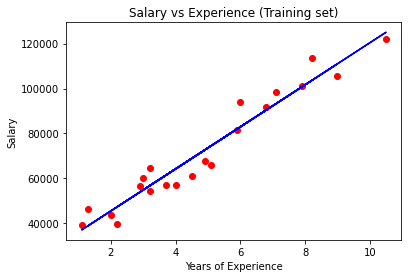

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

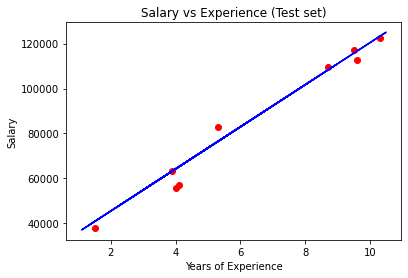

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

6. Simple linear regression from scratch



<img src="m.png">

In [11]:
def SimpleRegression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)

    num = 0
    den = 0

    for i in range(len(X)):
        num += (X[i] - mean_X) * (y[i] - mean_y)
        den += (X[i] - mean_X) ** 2

    m = num/den
    
    c = mean_y - (m * mean_X)
    
    return c, m


In [12]:
c, m = SimpleRegression(X, y)
print('c:',c, 'm:',m)

c: [25792.20019867] m: [9449.96232146]


[ 36187.15875227  36276.07731666  36364.99588104  36453.91444543
  36542.83300981  36631.7515742   36720.67013859  36809.58870297
  36898.50726736  36987.42583174  37076.34439613  37165.26296052
  37254.1815249   37343.10008929  37432.01865367  37520.93721806
  37609.85578245  37698.77434683  37787.69291122  37876.6114756
  37965.53003999  38054.44860438  38143.36716876  38232.28573315
  38321.20429753  38410.12286192  38499.04142631  38587.95999069
  38676.87855508  38765.79711947  38854.71568385  38943.63424824
  39032.55281262  39121.47137701  39210.3899414   39299.30850578
  39388.22707017  39477.14563455  39566.06419894  39654.98276333
  39743.90132771  39832.8198921   39921.73845648  40010.65702087
  40099.57558526  40188.49414964  40277.41271403  40366.33127841
  40455.2498428   40544.16840719  40633.08697157  40722.00553596
  40810.92410034  40899.84266473  40988.76122912  41077.6797935
  41166.59835789  41255.51692227  41344.43548666  41433.35405105
  41522.27261543  41611.191

Text(0, 0.5, 'Salary')

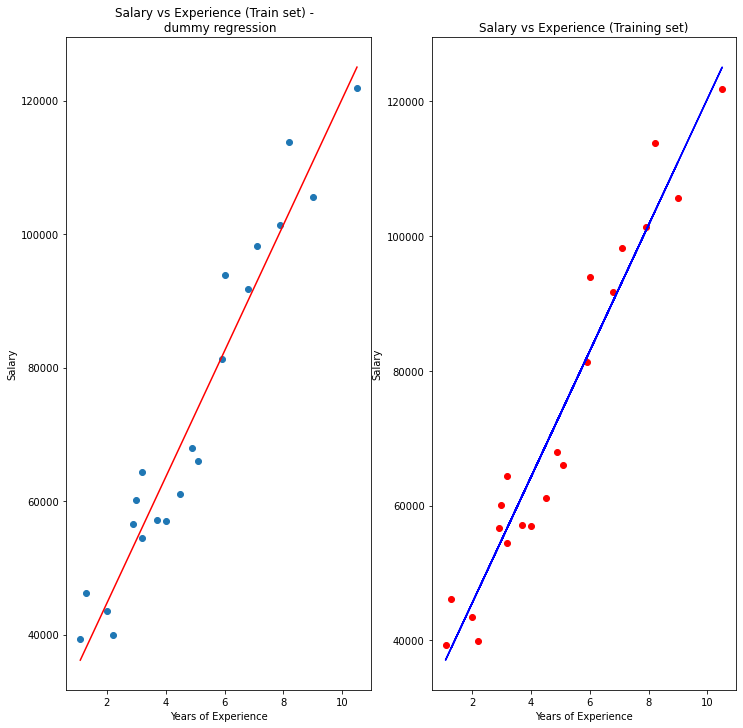

In [25]:
max_x = np.max(X_train) 
min_x = np.min(X_train)

x = np.linspace(min_x, max_x, 1000)
y1 = c + m * x 
print(y1)

plt.subplots(2, 2, figsize = (12, 12))
plt.subplot(1, 2, 1).scatter(X_train, y_train)
plt.plot(x, y1, color='red', label='Regression Line')
plt.title('Salary vs Experience (Train set) -  \n dummy regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.subplot(1, 2, 2).scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

7. R square method (goodness of fit)

In [42]:
from sklearn.metrics import mean_squared_error

mse = regressor.score(X, y)
print(mse)

0.9565144135078991


In [39]:
def R_squared(yp, y, m):
    mean_y = np.mean(y)
    r1 = 0
    r2 = 0

    for i in range(len(m)):
        r1 += (yp[i] - y[i]) ** 2
        r2 += (y[i] - mean_y) ** 2
    
    score = 1 - (r1 / r2)

    return score

In [43]:
mse_from_scratch = R_squared(y1, y, m)
print(mse_from_scratch)

0.9925895364542707
